Importation of Brian2

In [6]:
from brian2 import *

To not compile our code in C++, to earn some time (as our code is very simple) :

In [7]:
prefs.codegen.target = 'numpy'

In [11]:
%matplotlib inline

In [13]:
Rm     = 1 * Mohm
I      = 50 * nA

In [14]:
Rm

1. * Mohm

In [16]:
I * 10000

0.5 * mamp

In [17]:
Rm * I

50. * mvolt

In [54]:
start_scope()
Cm = 200 * pF
G_leak = 10 * nS
E_leak = -70 * mV

NN = 3
eqs = '''dVm/dt = (G_leak * (Vm - E_leak) + I_ext)/Cm : volt
I_ext : amp'''
neurons = NeuronGroup(NN, eqs, threshold = 'Vm > -55*mV',
                     reset = 'Vm = E_leak',method='exact')
neurons.Vm = E_leak
neurons.I_ext = [0.1,0.5,1.0] * nA
monitor = StateMonitor(neurons,'Vm',record = True) ## We are interested in all neurons
spike_monitor = SpikeMonitor(neurons) # For every spikes in the network, it gives the time points of the spike, and witch neurone spike --> used for raster plot
run(100*ms)

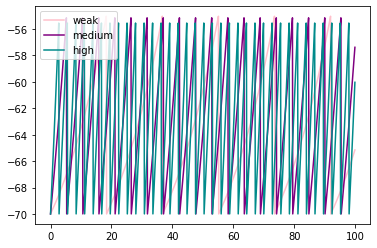

In [55]:
plot(monitor.t/ms, monitor.Vm[0]/mV,color='pink',label='weak');
plot(monitor.t/ms, monitor.Vm[1]/mV,color='purple',label='medium');
plot(monitor.t/ms, monitor.Vm[2]/mV,color='darkcyan',label='high');
legend()

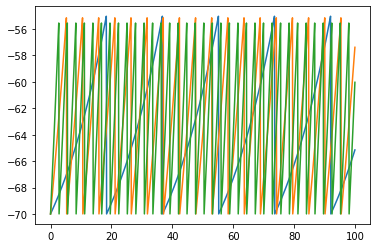

In [52]:
plot(monitor.t/ms, monitor.Vm.T/mV);

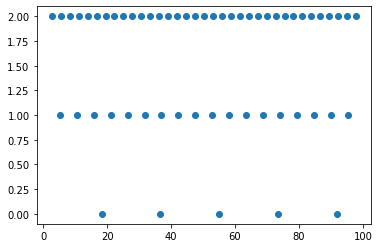

In [59]:
plot(spike_monitor.t/ms, spike_monitor.i,'o');

In [247]:
start_scope()
Cm = 200* pF
G_leak = 10 * nS
E_leak = -70 * mV
tau_syn = 5 * ms

NN = 1
eqs = '''dVm/dt = (G_leak * (Vm - E_leak) + I_syn)/Cm : volt
dI_syn/dt = -I_syn/tau_syn : amp'''
neurons = NeuronGroup(NN, eqs, threshold = 'Vm > -55*mV',
                     reset = 'Vm = E_leak',method='exact')
neurons.Vm = E_leak
neurons.I_syn = 1 * nA
monitor = StateMonitor(neurons,['Vm','I_syn'],record = True) ## We are interested in all neurons
spike_monitor = SpikeMonitor(neurons) 


run(100 * ms)

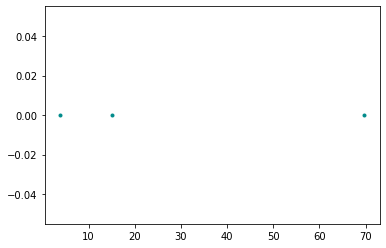

In [248]:
plot(spike_monitor.t/ms, spike_monitor.i,'.',color='darkcyan'); 

We want the FI curve

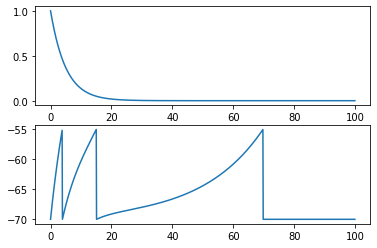

In [249]:
fig, ax = plt.subplots(2,1)
ax[0].plot(monitor.t/ms,monitor.I_syn[0]/nA);
ax[1].plot(monitor.t/ms,monitor.Vm[0]/mV);


When we change Cm, the slope is less curvy

In [206]:
start_scope()
input_spikes = PoissonGroup(10,rates=100*Hz)
input_monitor = SpikeMonitor(input_spikes)
run(100*ms)

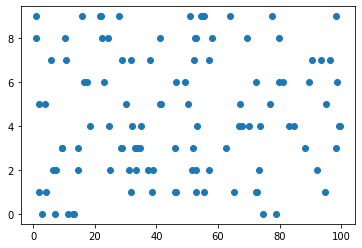

In [208]:
plot(input_monitor.t/ms, input_monitor.i, 'o');

In [244]:
start_scope()
Cm = 200* pF
G_leak = 10 * nS
E_leak = -70 * mV
tau_syn = 5 * ms


input_spikes = PoissonGroup(10,rates=100*Hz)
input_monitor = SpikeMonitor(input_spikes)

NN = 1
eqs = '''dVm/dt = (G_leak * (Vm - E_leak) + I_syn)/Cm : volt
dI_syn/dt = -I_syn/tau_syn : amp'''
neurons = NeuronGroup(NN, eqs, threshold = 'Vm > -55*mV',
                     reset = 'Vm = E_leak',method='exact')
neurons.Vm = E_leak
synapse = Synapses(input_spikes,neurons,'',
                  on_pre='I_syn += 0.05 * nA')
synapse.connect()
monitor = StateMonitor(neurons,['Vm','I_syn'],record = True) ## We are interested in all neurons
spike_monitor = SpikeMonitor(neurons) 


run(100 * ms)

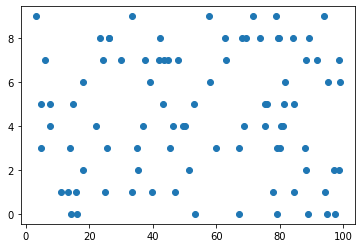

In [245]:
plot(input_monitor.t/ms, input_monitor.i, 'o');

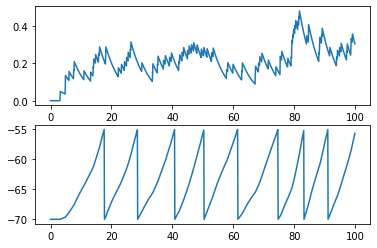

In [246]:
fig, ax = plt.subplots(2,1)
ax[0].plot(monitor.t/ms,monitor.I_syn[0]/nA);
ax[1].plot(monitor.t/ms,monitor.Vm[0]/mV);


In [242]:
start_scope()
Cm = 200* pF
G_leak = 10 * nS
E_leak = -70 * mV
tau_syn = 5 * ms


input_spikes = PoissonGroup(100,rates=100*Hz)
input_monitor = SpikeMonitor(input_spikes)

NN = 100
eqs = '''dVm/dt = (G_leak * (Vm - E_leak) + I_syn)/Cm : volt
dI_syn/dt = -I_syn/tau_syn : amp'''
neurons = NeuronGroup(NN, eqs, threshold = 'Vm > -55*mV',
                     reset = 'Vm = E_leak',method='exact')
neurons.Vm = E_leak
synapse = Synapses(input_spikes,neurons,'w:amp',
                  on_pre='I_syn += w')
synapse.connect(j = 'i') # i = indice for poisson neuron : the indicice of post-synaptic cell is called j ==> here you connect one synapse with one neuron
synapse.w = 0.1 * nA
monitor = StateMonitor(neurons,['Vm','I_syn'],record = True) ## We are interested in all neurons
spike_monitor = SpikeMonitor(neurons) 


run(1000 * ms)

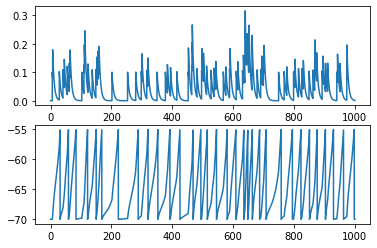

In [243]:
fig, ax = plt.subplots(2,1)
ax[0].plot(monitor.t/ms,monitor.I_syn[0]/nA);
ax[1].plot(monitor.t/ms,monitor.Vm[0]/mV);


In [239]:
start_scope()
Cm = 200* pF
G_leak = 10 * nS
E_leak = -70 * mV
tau_syn = 5 * ms


input_spikes = PoissonGroup(100,rates=linspace(0,100,100)*Hz)
input_monitor = SpikeMonitor(input_spikes)

NN = 100
eqs = '''dVm/dt = (G_leak * (Vm - E_leak) + I_syn)/Cm : volt
dI_syn/dt = -I_syn/tau_syn : amp'''
neurons = NeuronGroup(NN, eqs, threshold = 'Vm > -55*mV',
                     reset = 'Vm = E_leak',method='exact')
neurons.Vm = E_leak
synapse = Synapses(input_spikes,neurons,'w:amp',
                  on_pre='I_syn += w')
synapse.connect(j = 'i') # i = indice for poisson neuron : the indicice of post-synaptic cell is called j ==> here you connect one synapse with one neuron
synapse.w = 0.1 * nA
monitor = StateMonitor(neurons,['Vm','I_syn'],record = True) ## We are interested in all neurons
spike_monitor = SpikeMonitor(neurons) 


run(1000 * ms)

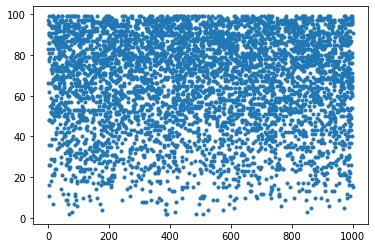

In [240]:
plot(input_monitor.t/ms, input_monitor.i, '.');

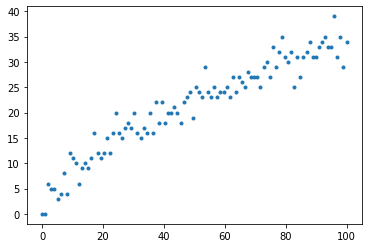

In [241]:
plot(input_spikes.rates,spike_monitor.count,'.');

In [266]:
start_scope()
Cm = 200* pF
G_leak = 10 * nS
E_leak = -70 * mV
tau_syn = 5 * ms


input_spikes = PoissonGroup(100,rates=np.linspace(0,100,100)*Hz)
input_monitor = SpikeMonitor(input_spikes)
## g was reversed
NN = 100
eqs = '''dVm/dt = (-G_leak * (Vm - E_leak) + I_syn)/Cm : volt
dI_syn/dt = -I_syn/tau_syn : amp'''
neurons = NeuronGroup(NN, eqs, threshold = 'Vm > -55*mV',
                     reset = 'Vm = E_leak',method='exact')
neurons.Vm = E_leak
synapse = Synapses(input_spikes,neurons,'w:amp',
                  on_pre='I_syn += w')
synapse.connect(j = 'i') # i = indice for poisson neuron : the indicice of post-synaptic cell is called j ==> here you connect one synapse with one neuron
synapse.w = 0.5 * nA
monitor = StateMonitor(neurons,['Vm','I_syn'],record = True) ## We are interested in all neurons
spike_monitor = SpikeMonitor(neurons) 


run(1000 * ms)

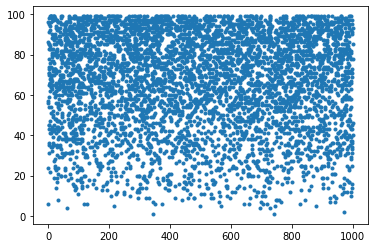

In [267]:
plot(input_monitor.t/ms, input_monitor.i, '.');

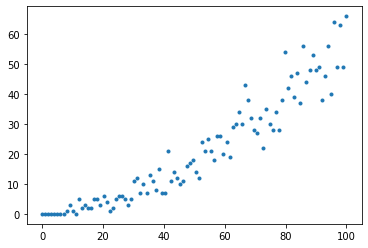

In [268]:
plot(input_spikes.rates,spike_monitor.count,'.');

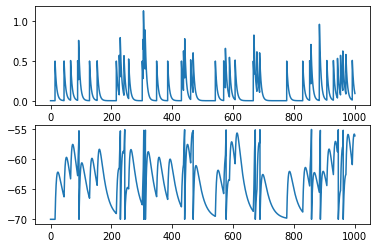

In [270]:
fig, ax = plt.subplots(2,1)
ax[0].plot(monitor.t/ms,monitor.I_syn[50]/nA);
ax[1].plot(monitor.t/ms,monitor.Vm[50]/mV);
